In [1]:
import numpy as np, matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import json
from bs4 import BeautifulSoup
import sys
from scipy import stats
from sklearn.cross_validation import *

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
master = pd.read_csv('data/lahman/Master.csv')
all_batting = pd.read_csv('data/lahman/Batting.csv')
pitching = pd.read_csv('data/lahman/Pitching.csv')

In [3]:
retro_to_lah = dict(zip(master['retroID'], master['playerID'])) #key: retroID, value lahmanID

In [4]:
smalldf = pd.read_csv('data/small.csv')
pitcherIDs = smalldf['pID'].unique()#RetroIDs
L_pitcherIDs = [retro_to_lah[name] for name in pitcherIDs] #LahmanIDs

In [5]:
grouped =  pitching.groupby('playerID').sum().reset_index()
mask = np.in1d(grouped.playerID, L_pitcherIDs)
pitcher_sums = grouped[mask]

For details on the Lahman file columns, see "2.3: Pitching Table": http://seanlahman.com/files/database/readme2014.txt

pitcher_sums is just the "sums", so be sure to recalculate things like ERA and BAOpp that don't add linearly

In [6]:
pitcher_sums.ERA = 9.*(pitcher_sums.ER)/(pitcher_sums.IPouts / 3.)
pitcher_sums.BAOpp = (pitcher_sums.H + pitcher_sums.BB + pitcher_sums.IBB + pitcher_sums.HBP) / pitcher_sums.BFP
pitcher_sums.head()

/Users/bcook/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,playerID,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,16069,8,15,17,298,0,0,0,69,919,271,144,35,169,305,0.352155,4.230686,19,11,15,1,1346,132,152,17,10,NaN
7,abbotji01,21932,12,87,108,263,254,31,6,0,5022,1779,791,154,620,888,0.341284,4.252688,30,53,32,11,7211,5,880,NaN,NaN,NaN
9,abbotpa01,23977,13,43,37,162,112,1,0,0,2162,682,394,101,393,496,0.349231,4.920444,17,37,21,0,3187,17,421,8,12,NaN
20,accarje01,20086,12,10,20,262,0,0,0,38,854,288,136,24,111,205,0.346972,4.299766,16,10,9,2,1222,115,143,5,13,NaN
21,aceveal01,14077,7,31,16,204,15,0,0,29,1141,333,162,48,129,282,0.310194,3.833479,6,5,28,6,1599,91,172,6,13,1


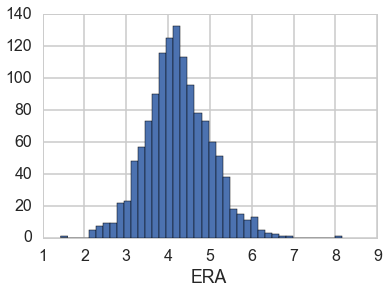

In [7]:
plt.hist(pitcher_sums.ERA, bins=40)
plt.xlabel('ERA')